El presente notebook es elaborado con fínes educativos a partir del libro: Johansson, Robert, *Numerical Python Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib*, Apress. (2019). Su propósito es mostrar las funcionalidades más báscias que un estudiante de física requiere saber de Sympy y Scipy.

Autor del Notebook: Ph.D. Santiago Echeverri Arteaga

# Sympy

<center>
<img src="sympy.png" alt="Logo Sympy"
     width="130"
     height="130">
<h1>Conociendo Sympy </h1>
</center>

Primero importamos las librerías que se aprenderán a usar en ente notebook y se ejecuta la función `init_printing()` el cual ayuda a que el formato del texto matemático sea más bonito (en Jupyter notebooks).

Debido a que se usarán en varias oportunidades algunas constantes se importarán de forma explícita. Nótese que al importarlos de sympy y no de numpy se está accediendo a su representación simbólica y no numérica.

In [2]:
import sympy as sp
import numpy as np
from sympy import I, pi, oo

sp.init_printing()

## Símbolos

En sympy los símbolos son una clase. Se puede crear mediante los comandos `sp.Symbol()`, `sp.symbols()` o `sp.var()`. Es aconsejable crear las variables con el nombre más cercano que lo represente.

Se puede pasr un kwarg con información del simbolo que se define de manera opcional. Los más usados son:

<center>
<img src="sym1.png" alt="Simbolos más usados. Tabla 3.1 del libro de referencia."
     width="500"
     height="300">
</center>

Definamos tres símbolos, mostremos el primero (que se vé con formato LaTex) y preguntemos si son reales o no.

In [3]:
x = sp.Symbol("x")
y = sp.Symbol("y", real=True)
z = sp.Symbol("z", imaginary=True)
display(x)
display(x.is_real)
display(y.is_real)
display(z.is_real)

None

True

False

Veamos que si sabe que el número será positivo sympy hace simplificaciones que están permitidas, sino no las hace.

In [4]:
x = sp.Symbol("x")
y = sp.Symbol("y", positive=True)
display(sp.sqrt(x**2))
display(sp.sqrt(y**2))


Consecuentemente, es importante decir si son enteros, pares, impares, etc.

In [5]:
n1 = sp.Symbol("n")
n2 = sp.Symbol("n", integer=True) 
n3 = sp.Symbol("n", odd=True)
display(sp.cos(n1 * pi))
display(sp.cos(n2 * pi))
display(sp.cos(n3 * pi))

Además se pueden crear varios símbolos a la vez con propiedades comunes usando el `sp.symbols()`

In [6]:
a, b, c = sp.symbols("a, b, c", negative=True)
display(a)

## Números

Sympy trabaja con un tipo propio de enteros y flotantes para que puedan tener las propiedades de los símbolos definidos antes como `.is_real`. Esto se hace de forma **automática** o manual. Se pueden llevar a ìnt` o a `float` usando los respectivos comandos de Python.

In [7]:
i = sp.Integer(19)
display(type(i))
print(f"i.is_Integer={i.is_Integer}, i.is_real={i.is_real},\
 i.is_odd={i.is_odd}")
f = sp.Float(2.3)
display(type(f))
print(f"f.is_Integer={f.is_Integer}, f.is_real={f.is_real},\
 .is_odd={f.is_odd}")
print(sp.Rational(11, 13))

sympy.core.numbers.Integer

i.is_Integer=True, i.is_real=True, i.is_odd=True


sympy.core.numbers.Float

f.is_Integer=False, f.is_real=True, .is_odd=False
11/13


Se puede `sp.sympify()` en un número para que sympy lo convierta al tipo de dato respectivo automáticamente. Además que esposible tener números muy grandes. Además, hay  que ver que es diferente el método `.is_Integer`del método `.is_integer`

In [12]:
i, f = sp.sympify(19), sp.sympify(2.3)
print(type(i), type(f))
x=sp.Symbol("x",integer=True)
print(f".is_Integer={i.is_Integer}, .is_integer={i.is_integer}")
print(f".is_Integer={x.is_Integer}, .is_integer={x.is_integer}")

print("i^50=",i**50)
print("Factorial de 150",sp.factorial(150))

<class 'sympy.core.numbers.Integer'> <class 'sympy.core.numbers.Float'>
.is_Integer=True, .is_integer=True
.is_Integer=False, .is_integer=True
i^50= 8663234049605954426644038200675212212900743262211018069459689001
Factorial de 150 57133839564458545904789328652610540031895535786011264182548375833179829124845398393126574488675311145377107878746854204162666250198684504466355949195922066574942592095735778929325357290444962472405416790722118445437122269675520000000000000000000000000000000000000


In [14]:
sp.oo*sp.oo*0

Además, existen cuertos números especiales:
<center>
<img src="sym2.png" alt="Números especiales. Tabla 3.2 del libro de referencia."
     width="450"
     height="200">
</center>

## Funciones

In [17]:
x, y, z = sp.symbols("x, y, z")
f = sp.Function("f")
print(type(f))
f(x)
g = sp.Function("g")(x, y, z) 
print("Tipo g",type(g))
display(f)
display(g)
display(g.free_symbols)


<class 'sympy.core.function.UndefinedFunction'>
Tipo g g


f

Es posible asignarle un valor funcional a una función igualandola a una expresión. Es decir, igualándola a una serie de operaciones sobre simbolos de sympy.

In [18]:
x = sp.Symbol('x')

# Definir la función 

f = x**2 - 4*x*sp.cos(2*pi*x)

display(f)

En Sympy también podemos simplificar expresiones o expandirlas. (Existen diferentes métodos para simplificar. `simplify`, `trigsimp`, `powsimp`, `combsimp` para las que involucran combinatorias y `ratsimp` simplifica expresiones buscando un denominador común)

In [19]:
expr = 2 * (x**2 - x) - x * (x + 1)
display(expr)
display(expr.simplify())
display(expr.simplify().expand())
print("Ahora con complejos")
a, b = sp.symbols("a, b", positive=True)
display(sp.exp(I*a + b).expand(complex=True))
display(sp.exp(I*a + b).expand())

Ahora con complejos


In [21]:
display(sp.factor(x**2 - 1))
display(sp.simplify(x**2 - 1))

Cuando no puede ser factorizado completamente pero se desea agrupar términos

In [22]:
expr = x + y + x * y * z
display(expr.collect(x))
display(expr.collect(y))

Y ahora fracciones parciales

apart


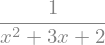

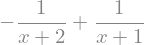

together


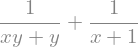

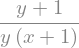

Cancel


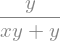

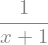

In [23]:
print("apart")
display(1/(x**2 + 3*x + 2))
display(sp.apart(1/(x**2 + 3*x + 2), x) )
print("together")
display(1 / (y * x + y) + 1 / (1+x))
display(sp.together(1 / (y * x + y) + 1 / (1+x)))
print("Cancel")
display(y / (y * x + y))
display(sp.cancel(y / (y * x + y)))

Para evaluar o sustituir variables usamos `subs`

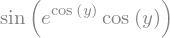

In [24]:
display(sp.sin(x * sp.exp(x)))
display(sp.sin(x * sp.exp(x)).subs(x, sp.cos(y)))

In [25]:
display(sp.sin(x * z))
display(sp.sin(x * z).subs({z: sp.exp(y), x: y, sp.sin: sp.cos}))

In [26]:
expr = x * y + z**2 *x
values = {x: 1.25, y: 0.4, z: 3.2}
expr.subs(values)

Evaluación numérica

In [27]:
print(f"1 + pi={sp.N(1 + pi)}")
print(f"sp.N(pi, 50)={sp.N(pi, 50)}")
print(f"(x + 1/pi).evalf(10)={(x + 1/pi).evalf(10)}")
expr = sp.sin(pi * x * sp.exp(x))
expr_func = sp.lambdify(x, expr)
display(expr_func(1.0))

1 + pi=4.14159265358979
sp.N(pi, 50)=3.1415926535897932384626433832795028841971693993751
(x + 1/pi).evalf(10)=x + 0.3183098862


In [31]:
xvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
expr_func = sp.lambdify(x, expr, 'numpy')
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

### Cálculo

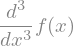

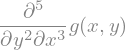

Expresión


Derivada


Tercer derivada


Expresión


Derivada respecto a x, y, z


In [35]:
f = sp.Function('f')(x)
display(sp.diff(f, x, 3))
g = sp.Function('g')(x, y)
display(g.diff(x, 3, y, 2))
expr = x**4 + x**3 + x**2 + x + 1
print("Expresión")
display(expr)
print("Derivada")
display(expr.diff(x))
print("Tercer derivada")
display(expr.diff(x, 3))
print("Expresión")
expr = (x + 1)**3 * y ** 2 * (z - 1)
display(expr)
print("Derivada respecto a x, y, z")
display(expr.diff(x,2, y, z))

### Jacobiano

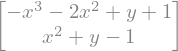

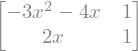

In [36]:
x, y = sp.symbols("x y")

# Definir el sistema de ecuaciones en forma matricial
f_mat = sp.Matrix([y - x**3 - 2*x**2 + 1, y + x**2 - 1])

# Definir el Jacobiano de las ecuaciones
f_jac = f_mat.jacobian([x, y])

display(f_mat)
display(f_jac)

### Derivadas de funciones más complejas

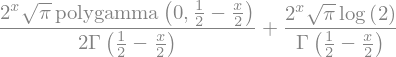

In [41]:
expr = sp.hermite(x, 0)
expr.diff(x).doit()

### Integrales

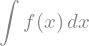

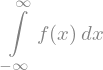

In [43]:
a, b, x, y = sp.symbols("a, b, x, y")
f = sp.Function("f")(x)
display(sp.integrate(f))
display(sp.integrate(f, (x, -oo, oo)))

In [44]:
sp.integrate(sp.sin(x))

In [45]:
sp.integrate(sp.sin(x), (x, a, b))

In [46]:
sp.integrate(sp.exp(-x**2), (x, 0, oo))

In [48]:
a, b, c = sp.symbols("a, b, c", positive=True)
display(a * sp.exp(-((x-b)/c)**2))
sp.integrate(a * sp.exp(-((x-b)/c)**2), (x, -oo, oo))

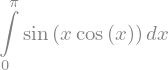

In [50]:
sp.integrate(sp.sin(x * sp.cos(x)), (x, 0, pi)).doit()

In [51]:
expr = sp.sin(x*sp.exp(y))
display(expr)
sp.integrate(expr, x)

### Integración múltiple

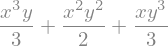

In [52]:
expr = (x + y)**2
sp.integrate(expr, x, y)

### Taylor

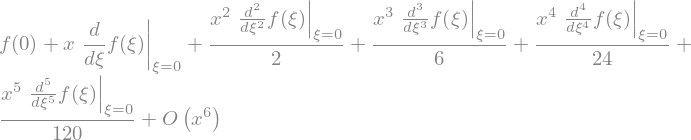

In [53]:
x, y = sp.symbols("x, y")
f = sp.Function("f")(x)
sp.series(f, x)

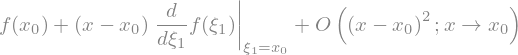

In [54]:
x0 = sp.Symbol("{x_0}")
f.series(x, x0, n=2)

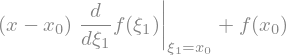

In [55]:
f.series(x, x0, n=2).removeO()

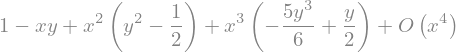

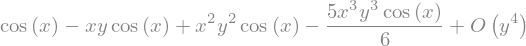

In [56]:
expr = sp.cos(x) / (1 + sp.sin(x * y))
display(expr.series(x, n=4))
display(expr.series(y, n=4))

### Límites

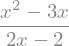

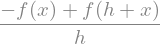

In [57]:
expr = (x**2 - 3*x) / (2*x - 2)
display(expr)
p = sp.limit(expr/x, x, oo)
display(p)
q = sp.limit(expr - p*x, x, sp.oo)
display(q)
#Ahora se procederá a definir una función, las variables x, h y la definición de la derivada por límite
f = sp.Function('f')
x, h = sp.symbols("x, h")
diff_limit = (f(x + h) - f(x))/h
display(diff_limit)
#Posteriormente se le pide que calcule la derivada por definición de coseno y el límite se sinc(x) en cero"
display(sp.limit(diff_limit.subs(f, sp.cos), h, 0),sp.limit(sp.sin(x) / x, x, 0))

### Sumas y productos

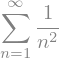

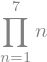

In [58]:
n= sp.symbols("n", integer=True)
x = sp.Sum(1/(n**2), (n, 1, oo))
display(x)
display(x.doit())
x = sp.Product(n, (n, 1, 7))
display(x)
display(x.doit())
x = sp.Symbol("x")
sp.Sum((x)**n/(sp.factorial(n)), (n, 1, oo)).doit().simplify()

### Ecuaciones

In [59]:
x = sp.Symbol("x")
sp.solve(x**2 + 2*x - 3) # Encuentra las raíces

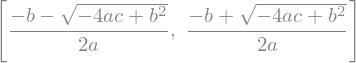

In [37]:
sp.solve(a * x**2 + b * x + c, x)

In [38]:
sp.solve(sp.sin(x) - sp.cos(x), x) # Sin problema para las trigonométricas

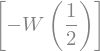

In [39]:
sp.solve(sp.exp(x) + 2 * x, x) # Ni para las que implican funciones especiales (Función W de Lambert)

Pero ioncluso Sympy tiene sus límites cuando se habla de funciones trascendentes o sin solución analítica. Esas requieren de un físico detrás del computador que sepa que hacer :D

In [40]:
sp.solve(x**5 - x**2 + 1, x)

In [41]:
sp.solve(sp.tan(x) + x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

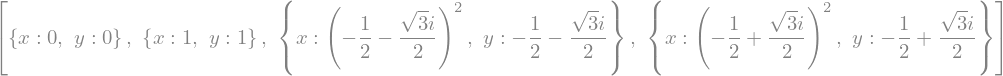

In [60]:
eq1 = x**2 - y
eq2 = y**2 - x
sp.solve([eq1, eq2], [x, y], dict=True)

### Álgebra lineal

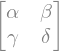

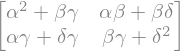

In [61]:
a, b, c, d = sp.symbols(r"\alpha , \beta , \gamma , \delta")
M = sp.Matrix([[a, b], [c, d]])
display(M)
display(M*M)

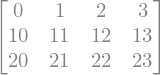

In [44]:
sp.Matrix(3, 4, lambda m, n: 10 * m + n)

Además, que se pueden implementar los siguientes métodos matriciales
<center>
<img src="sym3.png" alt="Métodos álgebra lineal. Tabla 3.4 del libro de referencia."
     width="450"
     height="450">
</center>

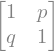

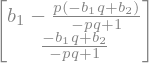

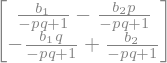

In [62]:
p, q = sp.symbols("p, q")
M = sp.Matrix([[1, p], [q, 1]])
b = sp.Matrix(sp.symbols("b_1, b_2"))
display(M,b)
x = M.LUsolve(b)
display(x)
x = M.inv() * b
display(x)

# Scipy

<center>
<img src="scipy.png" alt="Logo Scipy"
     width="130"
     height="130">
<h1>Conociendo Scipy </h1>
</center>

Scipy es básicamente una colección de módulos de cómputo científico de la cuál se suelen importar específicamente los módulos que se necesiten (o funciones en particular)

In [61]:
from scipy import linalg as la
from scipy import optimize, interpolate
import sympy as sp
sp.init_printing()
import numpy as np
from numpy import polynomial as P
import matplotlib.pyplot as plt

Algoritmo de bisección. Se exige que la función cambie de signo en el intervalo dado.

## Encontrar ceros

In [64]:
print("Resultado aproximado")
display(optimize.bisect(lambda x: np.exp(x)-2, -2, 2))
print("Resultado exacto")
np.log(2)

Resultado aproximado


Resultado exacto


Método de la secante (sin dar f') y de Newton (dando f')

In [70]:
# Definir la variable simbólica x
x = sp.Symbol("x")

# Definir la función f(x) en SymPy
f = sp.exp(x) - 2 

# Derivar f(x) para obtener la derivada fprime(x)
fprime = f.diff(x)
print(fprime)
# Convertir f y fprime en funciones lambdify
f_func = sp.lambdify(x, f, 'numpy')
fprime_func = sp.lambdify(x, fprime, 'numpy')

# Suponiendo que tu conjetura inicial es 2
x_root_guess = 2

# Usar el método de bisección
bisection_result = optimize.bisect(f_func, a=0, b=2)

# Usar el método de Newton
newton_result = optimize.newton(f_func, x0=x_root_guess, fprime=fprime_func)

print("Resultado de la bisección:", bisection_result)
print("Resultado de Newton:", newton_result)
print("Resultado exacto",np.log(2))


exp(x)
Resultado de la bisección: 0.6931471805601177
Resultado de Newton: 0.6931471805599453
Resultado exacto 0.6931471805599453


Interpolación inversa de Brent

In [71]:
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

## Minimización (Opcional)

Para minimizar hay diferentes métodos imlementados, como el `brent` o el `minimize_scalar` para funciones escalares univaluadas.

In [69]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
display(r_min)
optimize.minimize_scalar(f, bracket=(0.1, 4))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 5.535810445932086
       x: 0.5419260772557135
     nit: 15
    nfev: 18

Si es una función escalar de varias variables se usa el `minimize`

In [70]:
import numpy as np
from scipy.optimize import minimize

# Definir la función a minimizar
def complex_function(x):
    return (x[0] - 2)**2 + (x[1] - 3)**2 + np.sin(x[0]) + np.cos(x[1])

# Suponer una conjetura inicial
initial_guess = [0, 0]

# Utilizar el método 'L-BFGS-B' para minimizar la función
result = minimize(complex_function, initial_guess, method='L-BFGS-B')

print("Resultado de la minimización:", result)


Resultado de la minimización:   message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.15934998633481656
        x: [ 2.352e+00  3.047e+00]
      nit: 8
      jac: [ 0.000e+00 -1.110e-08]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


O el `optimize.fmin_ncg` que usa el método de Newton

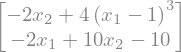

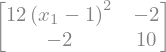

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8
Punto mímimo en (x1,x2)=[1.88292613 1.37658523]


In [71]:
# Define variables
x1, x2 = sp.symbols("x_1, x_2")
# Define función a minimizar para x1 y x2
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2
display(f_sym)

# Gradiente
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
display(sp.Matrix(fprime_sym))

# Matriz Hessiana
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]
# Hessian
display(sp.Matrix(fhess_sym))

# Convertir a funciones lambda interpretables en Numpy
f_lmbda = sp.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sp.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sp.lambdify((x1, x2), fhess_sym, 'numpy')
def func_XY_to_X_Y(f):
    """Wrapper for f(X) -> f(X[0], X[1])"""
    return lambda X: np.array(f(X[0], X[1]))
f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)
print(f"Punto mímimo en (x1,x2)={x_opt}")

Y finalmente miraremos el método de mínimos cuadrados `leastsq` que usa el método de Levenberg-Marquardt. (Hay muchos más)

In [ ]:
# Defino la función
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Genero puntos de forma aleatoria
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

# Defino función de residuos
def g(beta):
    return ydata - f(xdata, *beta)

# Optimizo
beta_start = (1, 1, 1)
beta_opt, _ = optimize.leastsq(g, beta_start)
print(beta_opt)

## Solucionar sistemas de ecuaciones

Para solucionar sistemas de ecuaciones se usa `fsolve` de scipy. Este puede ser usado a partir de expresiones simbólicas de Sympy o definiendo el sistema de ecuaciones como una función. Se solucionará el sistema de ecuaciones

\begin{align}
y-x^3-2x^2+1&=0\\
y+x^2-1&=0
\end{align}

Es importante probar las diferentes condiciones iniciales [-3,1] [-1,1] y [1,1] para mostrar que efectivamente el método encuentra la solución más cercana

In [74]:
# Definir variables simbólicas
x, y = sp.symbols("x y")

# Definir el sistema de ecuaciones en forma matricial
f_mat = sp.Matrix([y - x**3 - 2*x**2 + 1, y + x**2 - 1])

# Convertir el sistema de ecuaciones en funciones numéricas
f_func = sp.lambdify([(x, y)], [f_mat[0], f_mat[1]], 'numpy')

# Usar fsolve para encontrar la solución
initial_guess = [-1, 1]
result = optimize.fsolve(f_func, initial_guess)

print("Solución encontrada:", result)

Solución encontrada: [-1.  0.]


In [92]:
# Intriducir el sistema de ecuaciones
EC1 = "y - x**3 - 2*x**2 + 1"
EC2 = "y + x**2 - 1"


# Definir una función que representa el sistema de ecuaciones
def equations(vars):
    x, y = vars
    eq1 = eval(EC1)
    eq2 =  eval(EC2)
    return [eq1, eq2]


# Suponer una conjetura inicial
initial_guess = [1, 1]

# Utilizar fsolve para encontrar la solución
result = optimize.fsolve(equations, initial_guess)

print("Solución encontrada:", result)


Solución encontrada: [0.73205081 0.46410162]


Es interesante ver (Revisar libro guía) como manejar ligaduras

## Interpolación (Opcional)

La interpolación es un proceso matemático que estima valores intermedios entre puntos de datos conocidos. Se utiliza para predecir o estimar valores basados en datos discretos. Los métodos de interpolación incluyen la interpolación lineal (conectando puntos con líneas rectas), polinómica (ajustando polinomios a los datos), spline cúbico (polinomios cúbicos en segmentos), interpolación de datos irregulares (B-spline) y otros. La elección del método y la calidad de los datos influyen en la precisión. La interpolación es fundamental en matemáticas, ciencias e ingeniería para hacer predicciones y análisis de datos, pero debe aplicarse adecuadamente para evitar resultados inapropiados.

In [75]:
from scipy import interpolate

# Datos de ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

# Crear una función de interpolación lineal
interp_func = interpolate.interp1d(x, y, kind='linear')

# Evaluar la función interpolada en un nuevo punto
x_new = 2.5
y_new = interp_func(x_new)
print("Interpolación lineal en x =", x_new, "es y =", y_new)


Interpolación lineal en x = 2.5 es y = 6.5


In [76]:
from scipy.interpolate import lagrange

# Datos de ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 2, 3, 1, 5]

# Realizar interpolación polinómica de Lagrange
poly = lagrange(x, y)

# Evaluar el polinomio interpolante en un nuevo punto
x_new = 2.5
y_new = poly(x_new)
print("Interpolación polinómica en x =", x_new, "es y =", y_new)


Interpolación polinómica en x = 2.5 es y = 2.070312499999996


In [77]:
from scipy.interpolate import CubicSpline

# Datos de ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 2, 3, 1, 5]

# Crear una función de interpolación spline cúbico
interp_func = CubicSpline(x, y)

# Evaluar la función interpolada en un nuevo punto
x_new = 2.5
y_new = interp_func(x_new)
print("Interpolación spline cúbico en x =", x_new, "es y =", y_new)


Interpolación spline cúbico en x = 2.5 es y = 1.984375


In [78]:
from scipy.interpolate import interp1d

# Datos de ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 2, 3, 1, 5]

# Crear una función de interpolación de datos irregulares (B-spline)
interp_func = interp1d(x, y, kind='cubic')

# Evaluar la función interpolada en un nuevo punto
x_new = 2.5
y_new = interp_func(x_new)
print("Interpolación B-spline en x =", x_new, "es y =", y_new)


Interpolación B-spline en x = 2.5 es y = 1.984375


## Integración

SciPy ofrece varias herramientas para abordar este tipo de problemas. El primer ejemplo muestra la integración simple con diferentes métodos, y el segundo ejemplifica la integración doble.

In [82]:
import numpy as np
from scipy.integrate import quad, trapz, simps, nquad

# Función que deseamos integrar
func= lambda x: np.sin(x) / x

# Límites de integración
a = 0.01
b = 5.0

# Realizamos la integración simple
result_quad, _ = quad(func, a, b)
result_trapz = trapz(func(np.linspace(a, b, 100)), dx=0.01)
result_simps = simps(func(np.linspace(a, b, 100)), dx=0.01)

# Realizamos la integración doble
double_func = lambda x, y: x**2 + y**2

x_limits = [0, 1]
y_limits = [0, 1]
result_double, _ = nquad(double_func, [x_limits, y_limits])

# Mostramos los resultados
print("Resultado de la integración simple (quad):", result_quad)
print("Resultado de la integración simple (trapz):", result_trapz)
print("Resultado de la integración simple (simps):", result_simps)
print("Resultado de la integración doble:", result_double)


Resultado de la integración simple (quad): 1.5399313005000634
Resultado de la integración simple (trapz): 0.30552156671741015
Resultado de la integración simple (simps): 0.30551724525395507
Resultado de la integración doble: 0.6666666666666667


## Transformada de Fourier y Laplace

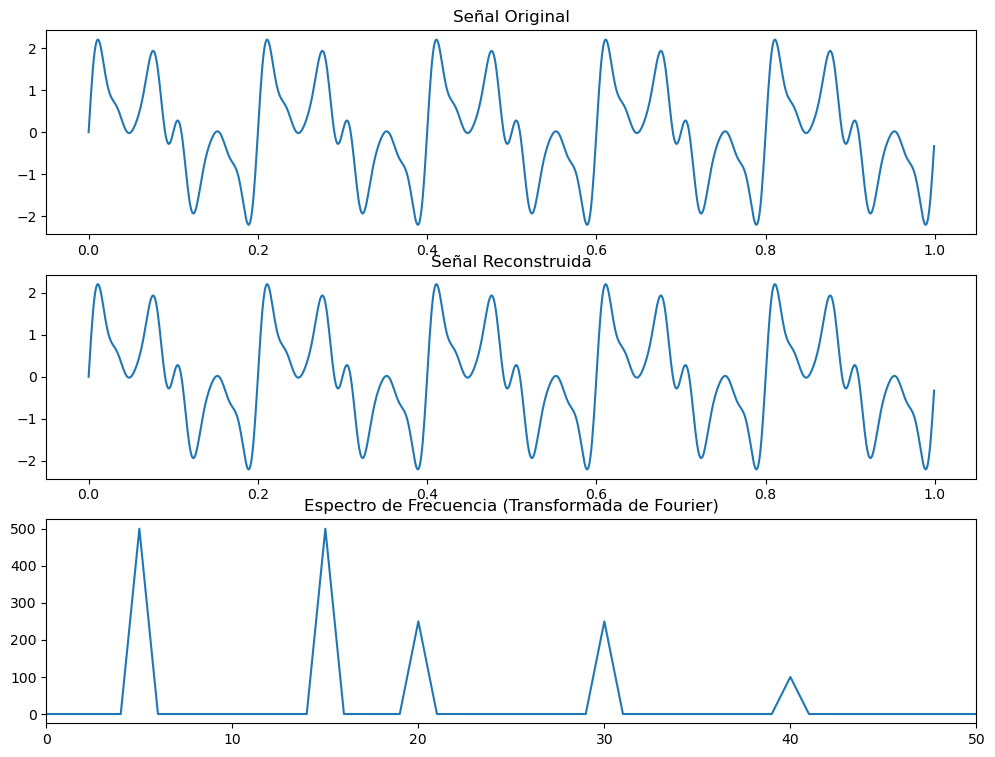

In [242]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Crear una señal de ejemplo con múltiples componentes de frecuencia
t = np.linspace(0, 1, 1000, endpoint=False)
frequencies = [5, 15, 20, 30, 40]
signal = np.sin(2 * np.pi * frequencies[0] * t) + np.sin(2 * np.pi * frequencies[1] * t) + \
         0.5 * np.sin(2 * np.pi * frequencies[2] * t) + \
         0.5 * np.sin(2 * np.pi * frequencies[3] * t) + \
         0.2 * np.sin(2 * np.pi * frequencies[4] * t)

# Calcular la Transformada de Fourier
fourier_transform = fft(signal)


# Calcular la Inversa de la Transformada de Fourier
reconstructed_signal = ifft(fourier_transform)

# Graficar la señal original y el espectro de frecuencia




freq = np.fft.fftfreq(len(t), d=1/1000)  # Resolución de frecuencia de 1000 Hz
freq = np.fft.fftshift(freq)
fourier_transform = np.fft.fftshift(fourier_transform)


fig= plt.figure(figsize=(12, 9))
ax = fig.subplots(3,1)
ax[0].plot(t, signal)
ax[0].set_title("Señal Original")

ax[1].plot(t, reconstructed_signal)
ax[1].set_title("Señal Reconstruida")
ax[2].plot(freq, np.abs(fourier_transform))
ax[2].set_title("Espectro de Frecuencia (Transformada de Fourier)")
ax[2].set_xlim(0, 50)
plt.show()


## ODE

### Ejemplo 1: Solución de una Ecuación Diferencial Ordinaria (EDO)

En este ejemplo, resolveremos la EDO $y'(t) = -2y(t)$ con una condición inicial $y(0) = 1$.


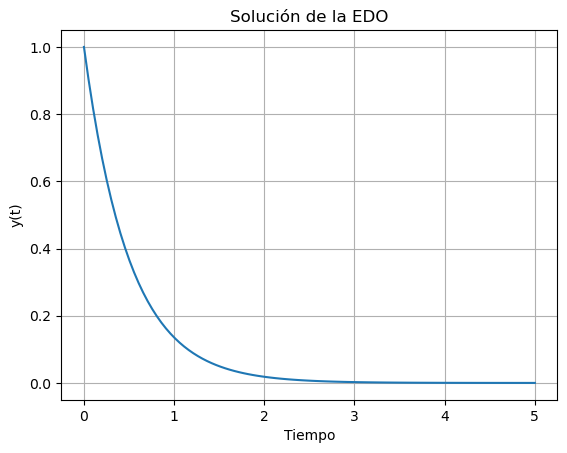

In [243]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir la función que describe la EDO
def model(y, t):
    dydt = -2 * y
    return dydt

# Condiciones iniciales
y0 = 1

# Tiempo
t = np.linspace(0, 5, 100)

# Resolver la EDO
y = odeint(model, y0, t)

# Graficar la solución
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('y(t)')
plt.title('Solución de la EDO')
plt.grid(True)
plt.show()

### Regresión Lineal

slope: 0.70, intercept: 1.70, r_value: 0.85, p_value: 0.85, std_err:0.25


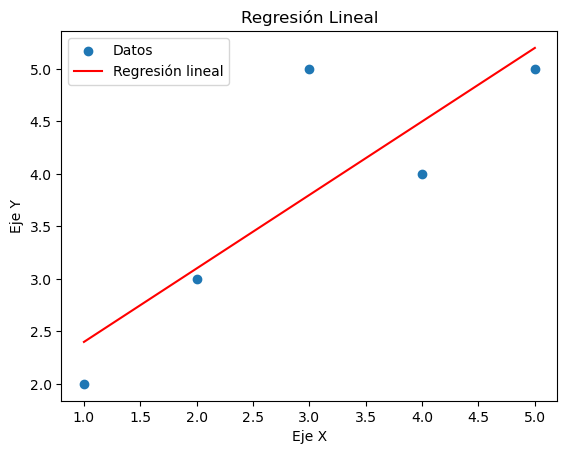

In [60]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 5])

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope: {slope:.2f}, intercept: {intercept:.2f}, r_value: {r_value:.2f}, p_value: {r_value:.2f}, std_err:{std_err:.2f}")
# Calcular la línea de regresión
line = slope * x + intercept

# Graficar los puntos y la línea de regresión

fig, ax = plt.subplots()
ax.scatter(x, y, label='Datos')
ax.plot(x, line, label='Regresión lineal', color='red')

# Configurar la leyenda y los ejes
ax.legend()
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Regresión Lineal')

# Mostrar el gráfico
plt.show()


### Ejemplo 2: Solución de un Sistema de Ecuaciones Diferenciales Ordinarias (SED)

En este ejemplo, resolveremos un sistema de EDOs que describe el crecimiento de dos poblaciones (Modelo presa/depredador Lotka Volterra):

\begin{align*}
\frac{dx}{dt} &= x(a - by) \\
\frac{dy}{dt} &= y(cx -d)
\end{align*}

con condiciones iniciales $x(0) = 40$ y $y(0) = 9$.

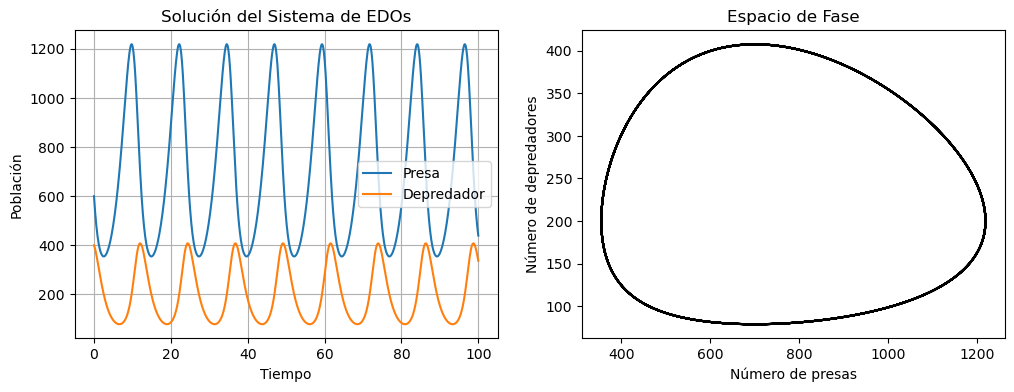

In [265]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir el sistema de EDOs
def model(z, t):
    x, y = z
    dxdt = a*x - b*x*y
    dydt = -d*y + c*x*y
    return [dxdt, dydt]

# Condiciones iniciales
a,b,c,d = 0.4, 0.002, 0.001, 0.7
z0 = [600, 400]

# Tiempo
t = np.linspace(0, 100, 1000)

# Resolver el sistema de EDOs
z = odeint(model, z0, t)

# Extraer las soluciones individuales
x, y = z[:, 0], z[:, 1]


fig= plt.figure(figsize=(12, 4))
ax = fig.subplots(1,2)
# Graficar las soluciones
ax[0].plot(t, x, label='Presa')
ax[0].plot(t, y, label='Depredador')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Población')
ax[0].set_title('Solución del Sistema de EDOs')
ax[0].legend(loc=5)
ax[0].grid(True)

ax[1].plot(x, y, color='k', label='Depredador')
ax[1].set_title('Espacio de Fase')
ax[1].set_xlabel('Número de presas')
ax[1].set_ylabel('Número de depredadores')
plt.show()

# Matplotlib

<center>
<img src="plt.png" alt="Logo Matplotlib"
     width="130"
     height="130">
<h1>Conociendo Matplotlib </h1>
</center>

Matplotlib es la librería de graficación por excelencia de Python sobre la que se han construido otras como [Seaborn](https://seaborn.pydata.org) y [Geopandas](https://geopandas.org/en/stable/). Además de que Pandas tiene un módulo que permite hacer gráficas de DataFrames sobre matplotlib (entre otras)

<center>
<h2>Anatomía de una gráfica </h2>
<img src="figure-anatomy.png" alt="Anatomía de una gráfica"
     width="500"
     height="500">
</center>

## Definir `figure` y `axes`

### Mediante GridSpec

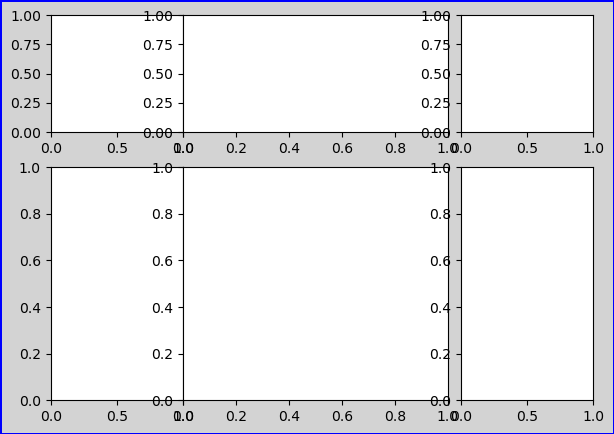

In [1]:
import matplotlib.pyplot as plt

# Define una figura con todos los kwargs
fig_kwargs = {
    'figsize': (7, 5),
    'facecolor': 'lightgray',
    'edgecolor': 'blue',
    'constrained_layout': False,
    'linewidth':1
}

fig = plt.figure(**fig_kwargs)

# Define un GridSpec con todos los kwargs
gs_kwargs = {
    'figure': fig,
    'ncols': 4,
    'nrows': 2,
    'width_ratios': [10, 20, 1, 10],
    'height_ratios': [1, 2],
    'wspace': 0.,
    'hspace': 0.2,
}

gs = fig.add_gridspec(**gs_kwargs)

# Crea subplots en la retícula desigual
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 3])



# Muestra la figura
plt.show()


### Mediante subplots

/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


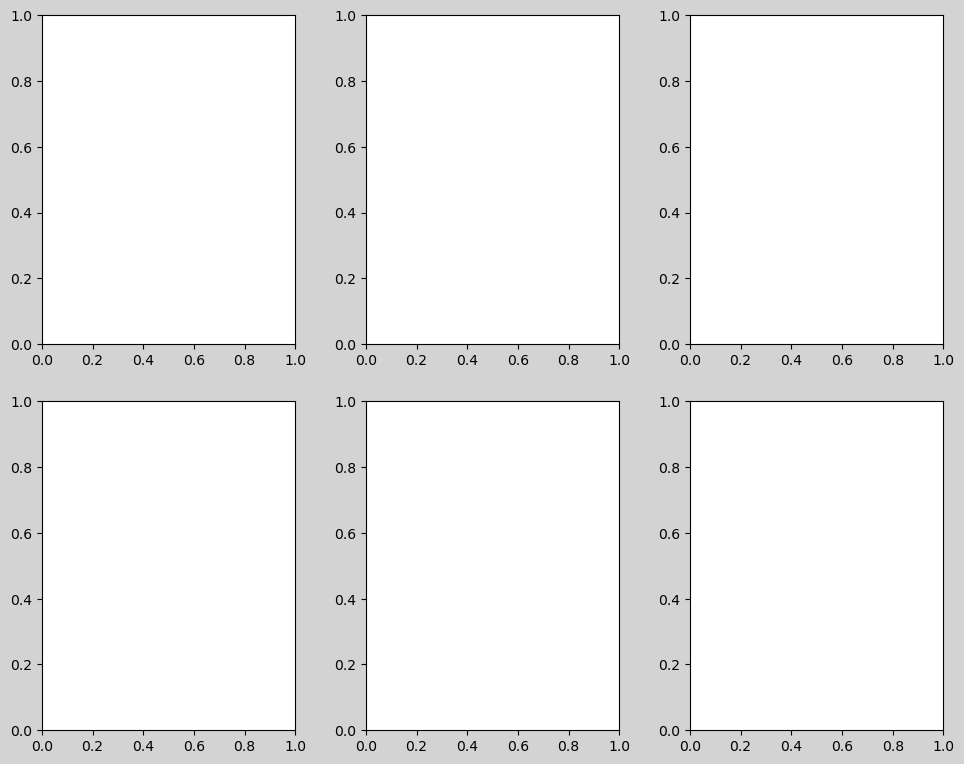

In [2]:
import matplotlib.pyplot as plt

# Define una figura con todos los kwargs
fig_kwargs = {
    'figsize': (10, 8),
    'dpi': 100,
    'facecolor': 'lightgray',
    'edgecolor': 'blue',
    'frameon': True,
    'tight_layout': {'pad': 2},
    'constrained_layout': False,
}

fig, axes = plt.subplots(2, 3, **fig_kwargs)

# Muestra la figura
plt.show()


### Mediante add_axes (Ver después de entender el comando plot y xlim)

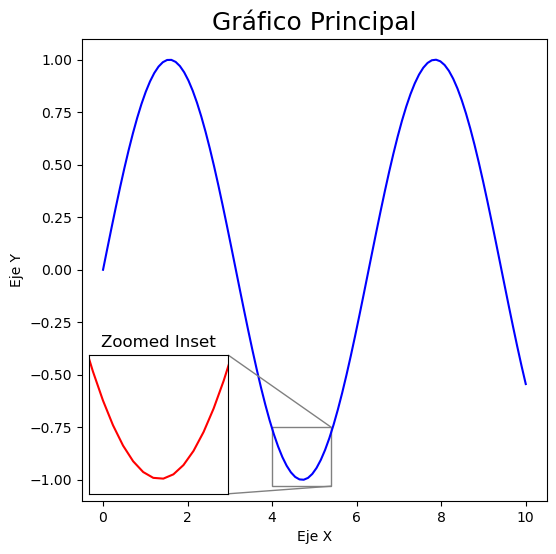

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np

# Crear una figura y un Axes principal
fig, ax_main = plt.subplots(figsize=(6, 6))

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot principal
ax_main.plot(x, y, label='Datos Principales', color='blue')
ax_main.set_xlabel('Eje X')
ax_main.set_ylabel('Eje Y')
ax_main.set_title('Gráfico Principal',size=18)

# Crear un inset_axes (Axes dentro del principal)
ax_inset = inset_axes(ax_main, width='30%', height='30%', loc='lower left')
ax_inset.set_xlim(4,5.4)
ax_inset.set_ylim(-1.03,-0.75)

# Plot en el inset_axes
ax_inset.plot(x, y, label='Zoom', color='red')
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_title('Zoomed Inset')

# Configurar el zoom
mark_inset(ax_main, ax_inset, loc1=1, loc2=4, fc='none', ec='0.5')

plt.show()


## Plot

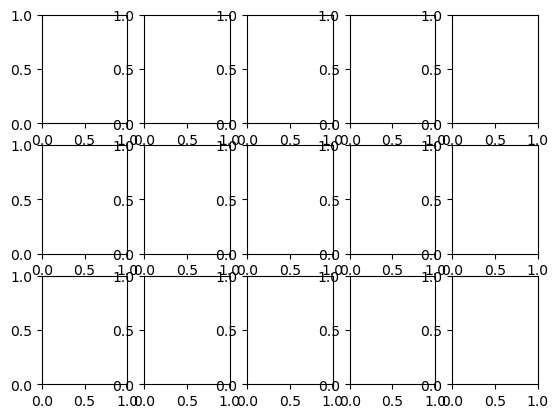

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definir un rango de valores x
x = np.linspace(0, 10, 100)

# Definir varias funciones y etiquetas
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2 * x)
y4 = np.cos(2 * x)

# Crear una figura y un conjunto de ejes (subplots)
fig, ax = plt.subplots(ncols=5,nrows=3)

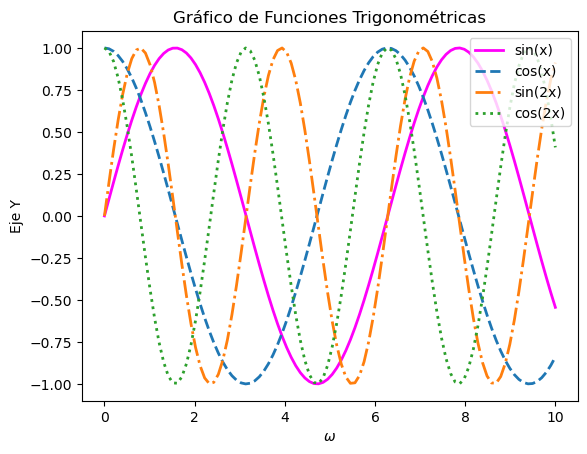

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir un rango de valores x
x = np.linspace(0, 10, 100)

# Definir varias funciones y etiquetas
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2 * x)
y4 = np.cos(2 * x)

# Crear una figura y un conjunto de ejes (subplots)
fig, ax = plt.subplots()

# Graficar las funciones con diferentes estilos
ax.plot(x, y1, linestyle='-', linewidth=2, label='sin(x)', color="#FF00FA")
ax.plot(x, y2, linestyle='--', linewidth=2, label='cos(x)')
ax.plot(x, y3, linestyle='-.', linewidth=2, label='sin(2x)')
ax.plot(x, y4, linestyle=':', linewidth=2, label='cos(2x)')

# Personalizar el gráfico
ax.set_title('Gráfico de Funciones Trigonométricas')
ax.set_xlabel(r'$\omega$')
ax.set_ylabel('Eje Y')
ax.legend(loc=1)

# Mostrar el gráfico
plt.show()


### En eje 3D

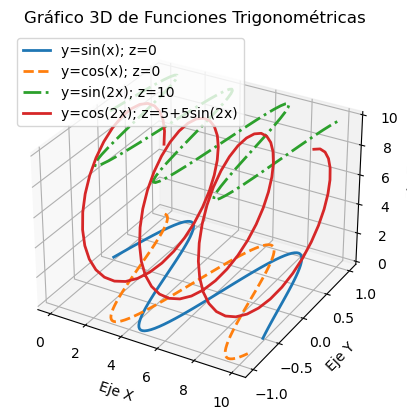

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Importar Axes3D para gráficos 3D
from mpl_toolkits.mplot3d import Axes3D

# Definir un rango de valores x
x = np.linspace(0, 10, 100)

# Definir varias funciones en 3D
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2 * x)
y4 = np.cos(2 * x)

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(122, projection='polar')

# Graficar las funciones en 3D
ax.plot(x, y1, zs=0, zdir='z', linestyle='-', linewidth=2, label='y=sin(x); z=0')
ax.plot(x, y2, zs=0, zdir='z', linestyle='--', linewidth=2, label='y=cos(x); z=0')
ax.plot(x, y3, zs=10, zdir='z', linestyle='-.', linewidth=2, label='y=sin(2x); z=10')
ax.plot(x, y4, 5*y3+5, linestyle='-', linewidth=2, label='y=cos(2x); z=5+5sin(2x)')

# Personalizar el gráfico
ax.set_title('Gráfico 3D de Funciones Trigonométricas')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.legend()

# Mostrar el gráfico
plt.show()


## Personalizar la gráfica

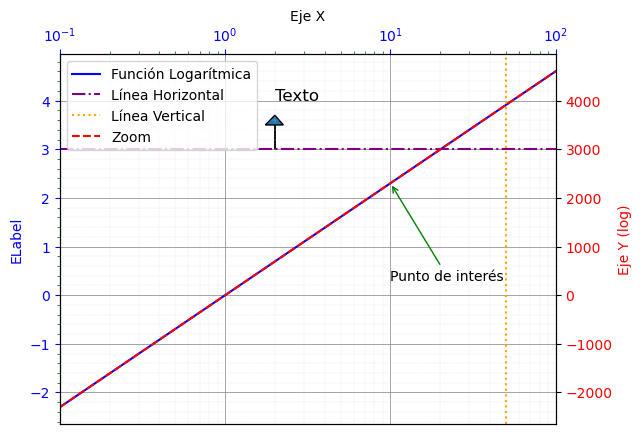

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.linspace(0.1, 100, 100)
y = np.log(x)

# Crear una figura y ejes principales
fig, ax1 = plt.subplots()

# Graficar en el eje principal
ax1.plot(x, y, color='blue', label='Función Logarítmica')

# Personalizar el eje principal
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y (log)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Cambiar uno de los ejes a escala logarítmica
ax1.set_xscale('log')

# Crear ejes secundarios (twin axes) para el zoom
ax2 = ax1.twinx()

# Graficar en el eje secundario (zoom)
ax2.plot(x, 1000*y, color='red', linestyle='--', label='Zoom')
ax2.set_ylabel('Eje Y (log)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Cambiar los límites en el eje X
ax1.set_xlim(0.1, 100)

# Agregar un annotate y una flecha
arrow_x = 10
arrow_y = np.log(arrow_x)
ax1.annotate('Punto de interés', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y - 2),
             arrowprops=dict(arrowstyle='->', color='green'))

# Agregar una línea horizontal y una línea vertical
ax1.axhline(y=3, color='purple', linestyle='-.', label='Línea Horizontal')
ax1.axvline(x=50, color='orange', linestyle=':', label='Línea Vertical')

# Personalizar los ticks y los labels en los ejes
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelcolor='blue', color='blue')
ax1.tick_params(axis='both', which='minor', color='green', labelcolor='green')

# Cambiar el color al eje izquierdo
ax1.set_ylabel('ELabel', color='blue')

# Mostrar el label del eje x y los ticks arriba
ax1.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')

# Mostrar una cuadrícula mayor y una cuadrícula menor con estilos diferentes
ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray')
ax1.grid(True, which='minor', linestyle='--', linewidth=0.2, color='lightgray')

# Mostrar la leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2)

# Agregar texto por encima de la gráfica
ax1.text(2, 4, 'Texto', fontsize=12, color='black')
ax1.arrow(2, 3, 0,0.5, head_width=0.5, head_length=0.2)

# Mostrar el gráfico
plt.show()


## Scatter

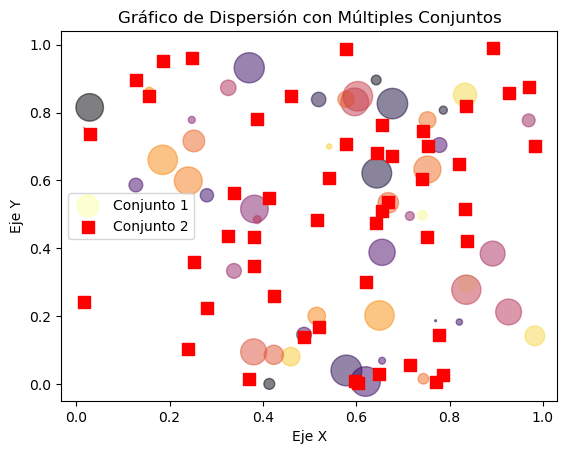

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Definir datos de ejemplo
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

# Crear una figura y un conjunto de ejes (subplots)
fig, ax = plt.subplots()

# Graficar los datos con diferentes estilos de dispersión y colores
ax.scatter(x, y, c=np.random.rand(50), cmap="inferno",
           alpha=0.5, marker='o', s=500*np.random.rand(50), label='Conjunto 1')
ax.scatter(x, z, c='red', marker='s', s=80, label='Conjunto 2')

# Personalizar el gráfico
ax.set_title('Gráfico de Dispersión con Múltiples Conjuntos')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.legend()

# Mostrar el gráfico
plt.show()


## Grafico vectorial

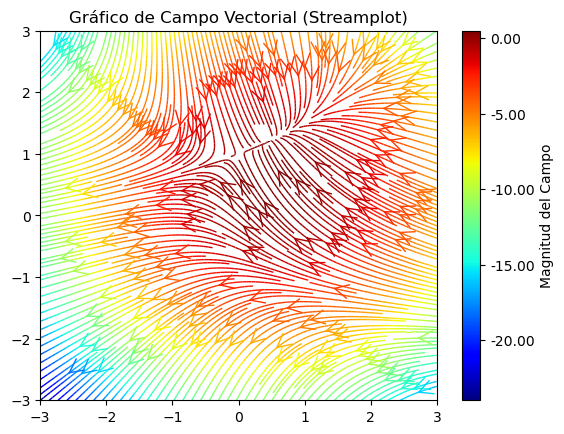

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una malla de coordenadas
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Definir un campo vectorial más complicado
U = -1 - X**2 + Y
V = 1 + X - Y**2

# Crear una figura y ejes para el gráfico de campo vectorial
fig, ax = plt.subplots()

# Graficar el campo vectorial utilizando streamplot
stream = ax.streamplot(X, Y, U, V, color=U+V, linewidth=1, density=3., arrowstyle='->', 
                      arrowsize=2.5, cmap='jet')

# Personalizar el gráfico de campo vectorial
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title('Gráfico de Campo Vectorial (Streamplot)')

# Agregar una barra de color para representar la magnitud del campo
cbar = fig.colorbar(stream.lines, ax=ax, format='%.2f')
cbar.set_label('Magnitud del Campo')

# Mostrar el gráfico
plt.show()


## Grafico de errores

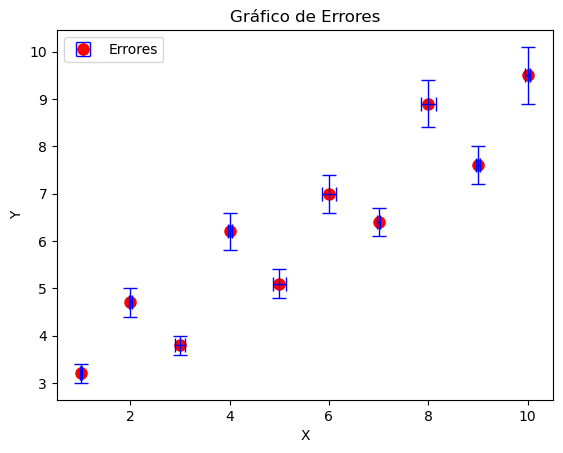

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo con más puntos
x = np.arange(1, 11)
y = np.array([3.2, 4.7, 3.8, 6.2, 5.1, 7.0, 6.4, 8.9, 7.6, 9.5])
y_err = np.array([0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.5, 0.4, 0.6])
x_err = np.array([0.02, 0.03, 0.1, 0.04, 0.13, 0.14, 0.03, 0.15, 0.04, 0.06])

# Crear una figura y ejes para el gráfico de errores
fig, ax = plt.subplots()

# Graficar los errores
ax.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='o', color='red', markersize=8, capsize=5,
            elinewidth=1, capthick=1, barsabove=True, ecolor='blue', errorevery=1,
            linestyle='--', linewidth=0.001, label='Errores')

# Personalizar el gráfico de errores
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Gráfico de Errores')
ax.legend()

# Mostrar el gráfico
plt.show()


## Histograma

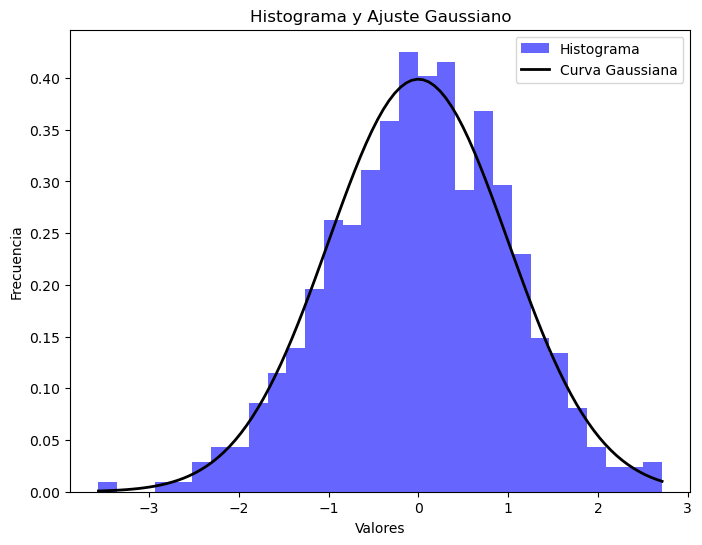

In [215]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar datos aleatorios con distribución normal
mu, sigma = 0, 1
datos = np.random.normal(mu, sigma, 1000)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un histograma de los datos
n, bins, patches = ax.hist(datos, bins=30, density=True, alpha=0.6, color='b', label='Histograma')

# Calcular los valores para la curva gaussiana
xmin, xmax = min(bins), max(bins)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma) #Probability Density Function

# Trazar la curva gaussiana
ax.plot(x, p, 'k', linewidth=2, label='Curva Gaussiana')

# Etiquetas y título
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma y Ajuste Gaussiano')

# Leyenda
ax.legend()

plt.show()


## Barras

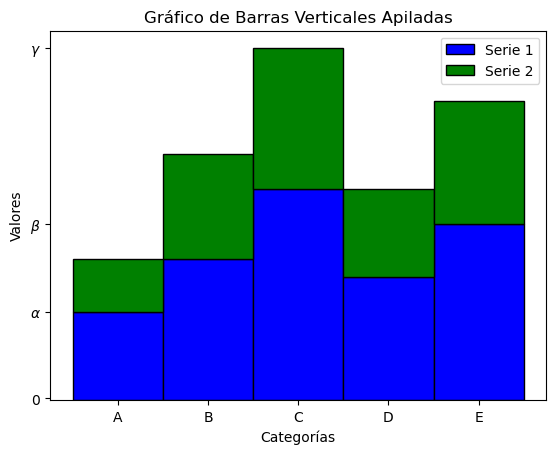

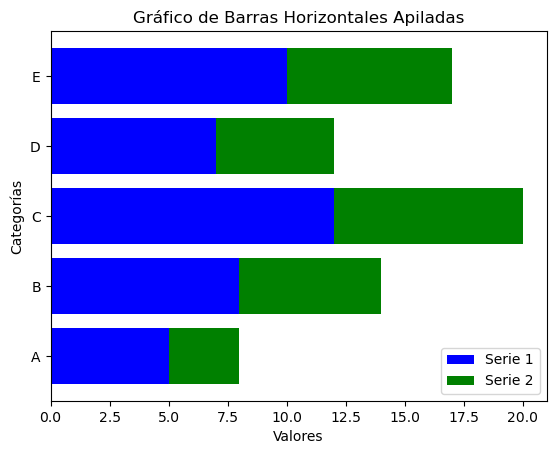

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
categorias = ['A', 'B', 'C', 'D', 'E']
valores1 = [5, 8, 12, 7, 10]
valores2 = [3, 6, 8, 5, 7]

# Crear una figura y ejes para el gráfico de barras verticales apiladas
fig, ax1 = plt.subplots()

# Graficar barras verticales apiladas
width = 1.#35
bar1 = ax1.bar(categorias, valores1, width, label='Serie 1', color='blue', edgecolor="black")
bar2 = ax1.bar(categorias, valores2, width, label='Serie 2', color='green', bottom=valores1, edgecolor="black")

# Personalizar el gráfico de barras verticales apiladas
ax1.set_xlabel('Categorías')
ax1.set_ylabel('Valores')
ax1.set_title('Gráfico de Barras Verticales Apiladas')
ax1.legend()

# Crear una figura y ejes para el gráfico de barras horizontales apiladas
fig, ax2 = plt.subplots()

# Graficar barras horizontales apiladas
bar1 = ax2.barh(categorias, valores1, label='Serie 1', color='blue')
bar2 = ax2.barh(categorias, valores2, label='Serie 2', color='green', left=valores1)

# Personalizar el gráfico de barras horizontales apiladas
ax2.set_xlabel('Valores')
ax2.set_ylabel('Categorías')
ax2.set_title('Gráfico de Barras Horizontales Apiladas')
ax1.set_yticks([0.1,5,10,20])
ax1.set_yticklabels([r"$0$",r"$\alpha$",r"$\beta$",r"$\gamma$"])
ax2.legend()

# Mostrar los gráficos
plt.show()


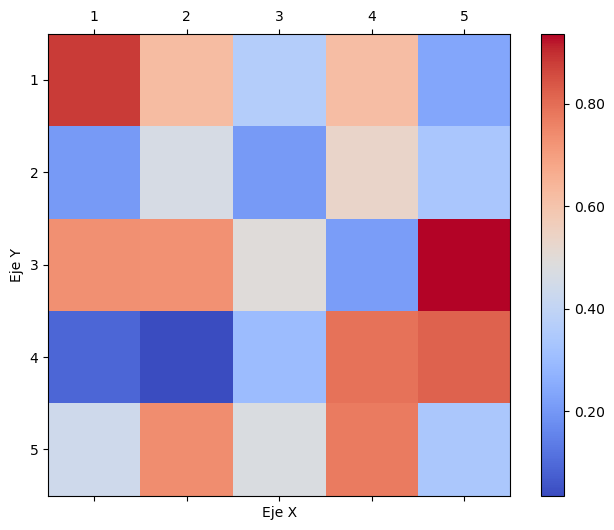

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una matriz 2D de ejemplo para la tomografía cuántica
matriz = np.random.rand(5, 5)

# Tamaño de la matriz
n = matriz.shape[0]

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear colores para las barras
#colores = [['b' if i == j else 'g' for i in range(n)] for j in range(n)]

# Trazar el gráfico de barras 2D con colores
color = ax.matshow(matriz, cmap='coolwarm')
#for i in range(n):
#    for j in range(n):
#        ax.text(j, i, f'{matriz[i, j]:.2f}', ha='center', va='center', color=colores[i][j])
cbar = fig.colorbar(color, ax=ax, format='%.2f')

# Etiquetas de ejes
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([1,2,3,4,5])

ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels([1,2,3,4,5])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

plt.show()


In [15]:
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print(x,y)

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3] [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


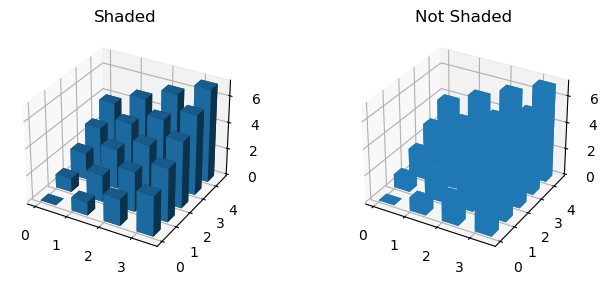

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 0.5

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

## Torta

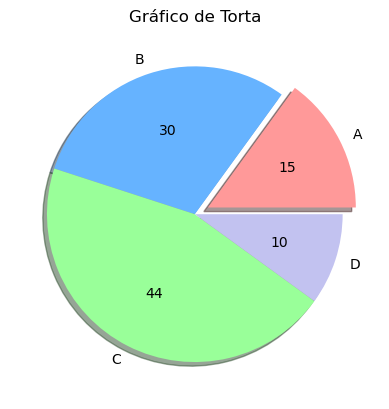

In [28]:
import matplotlib.pyplot as plt

# Datos de ejemplo
etiquetas = ['A', 'B', 'C', 'D']
valores = [15, 30, 45, 10]

# Colores para las partes del gráfico
colores = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

# Explode para resaltar una porción
explode = (0.1, 0, 0, 0)

# Crear una figura y ejes para el gráfico de torta
fig, ax = plt.subplots()

# Graficar el gráfico de torta
ax.pie(valores,
            colors=colores,
            labels=['A','B','C', 'D'], explode=explode,
            labeldistance=1.1, shadow=True, startangle=0,
            autopct='%d', pctdistance=0.6)

# Personalizar el gráfico de torta
ax.set_title('Gráfico de Torta')

# Mostrar el gráfico
plt.show()


## Polar

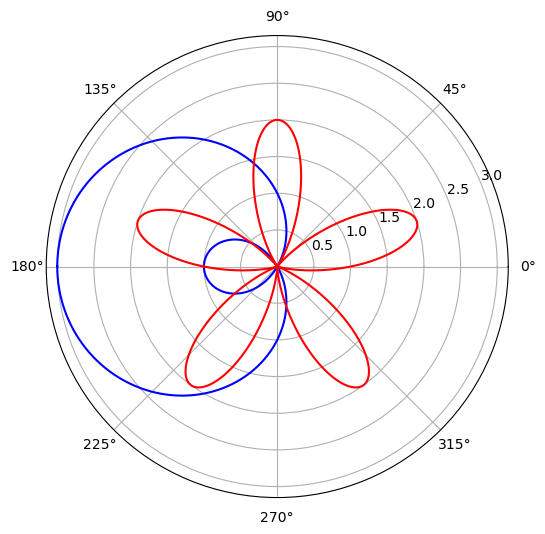

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes

# Datos de ejemplo
theta = np.linspace(-np.pi, np.pi, 1000)

r=1-2*np.cos(theta)

# Crear una figura y ejes polares
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='polar')

theta = np.linspace(-np.pi, np.pi, 1000)
r2=1 + np.sin(5 * theta)

ax.plot(theta+(r<0)*np.pi,np.abs(r), "b")
ax.plot(theta, r2, "r")

# Personaliza la gráfica
#ax.set_yticks([1,2,3])
#ax.set_yticklabels(['','',''])

plt.show()



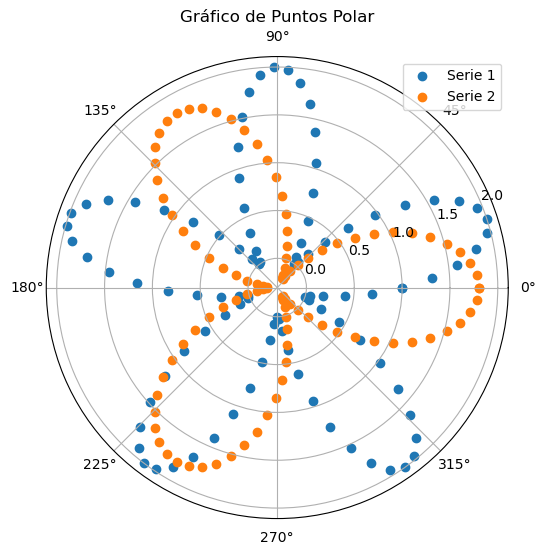

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes

# Datos de ejemplo
theta = np.linspace(0, 2 * np.pi, 100)
r1 = 1 + np.sin(5 * theta)
r2 = 0.8 + np.cos(3 * theta)

# Crear una figura y ejes polares
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='polar')

# Graficar en el eje polar
ax.scatter(theta, r1, label='Serie 1')
ax.scatter(theta, r2, label='Serie 2')
ax.legend()
ax.set_title('Gráfico de Puntos Polar')

plt.show()


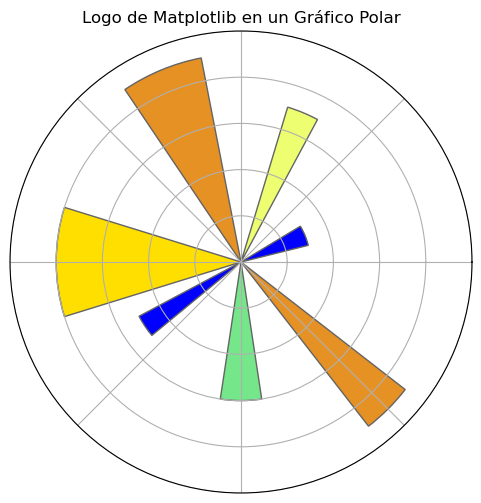

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes

# Datos para emular el logo de Matplotlib
theta = np.array([1,3,5,8,9.5,12,14])*np.pi/8
r = [1.5, 3.5, 4.5, 4, 2.5, 3, 4.5]
width = [0.3, 0.2, 0.4, 0.6, 0.2, 0.3, 0.25]
color = ["b", "#E5FF28AA", "#E58914EE", "#ffdf00", "b", "#76e68a", "#E58914EE"]

# Crear una figura y ejes polares
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='polar')

# Graficar en el eje polar como un gráfico de barras
ax.bar(theta, r, width=width, color=color, linewidth=1, edgecolor="#646464")

# Configurar el eje polar para que se vea como el logo de Matplotlib
ax.set_rmax(5)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.title('Logo de Matplotlib en un Gráfico Polar')
plt.show()


## Grafico de Contornos

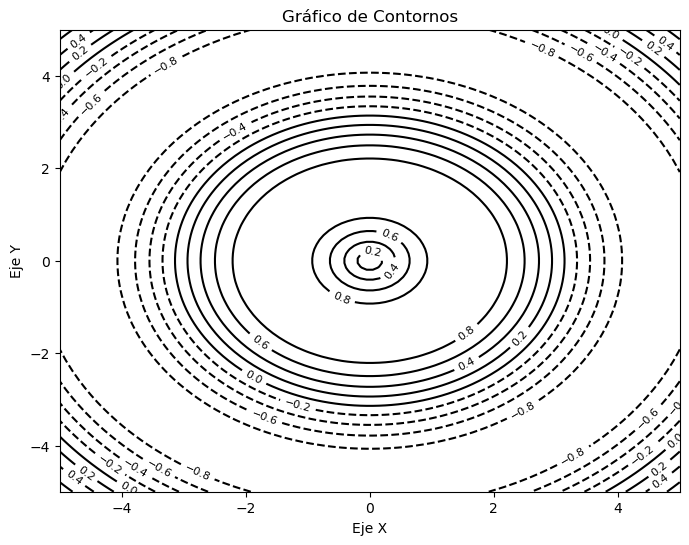

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo: una función z = f(x, y)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un gráfico de contornos
contours = ax.contour(X, Y, Z, levels=10, colors='k')

# Etiquetas de ejes y título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfico de Contornos')

# Añadir etiquetas de contorno
ax.clabel(contours, inline=True, fontsize=8)

plt.show()


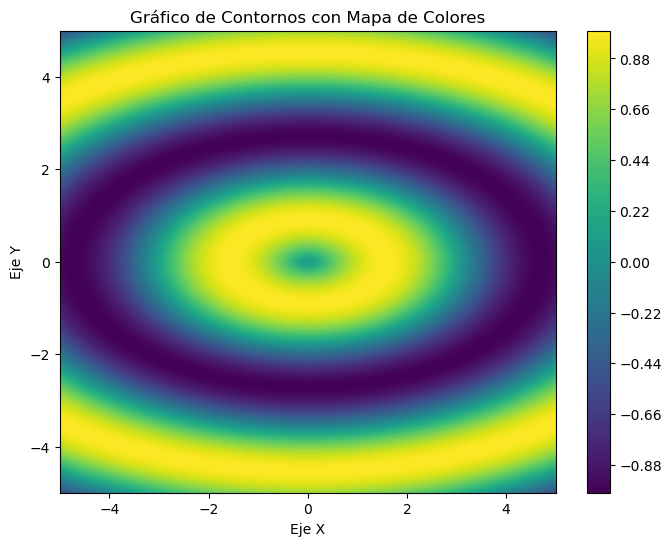

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo: una función z = f(x, y)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + 3*Y**2))

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un gráfico de contornos con mapa de colores
contours = ax.contourf(X, Y, Z, levels=100, cmap='viridis')

# Etiquetas de ejes y título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfico de Contornos con Mapa de Colores')

# Añadir una barra de colores
cbar = plt.colorbar(contours)

plt.show()


### Colormaps

Ver [este enlace oficial](https://matplotlib.org/stable/users/explain/colors/colormaps.html) para aprender más opciones de personalización de los cmaps

In [221]:
!pip install colorspacious

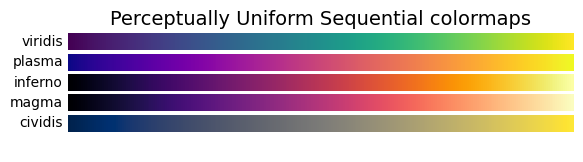

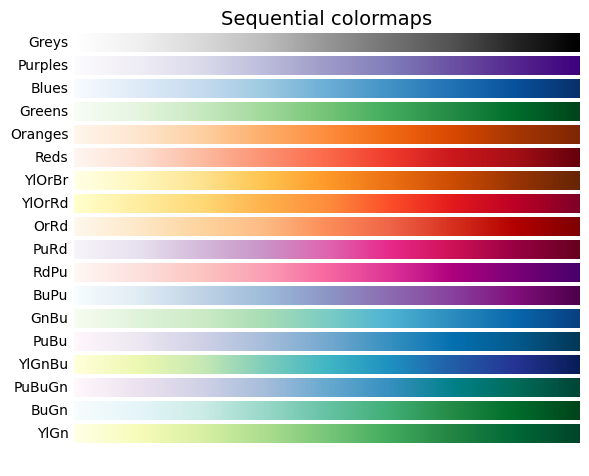

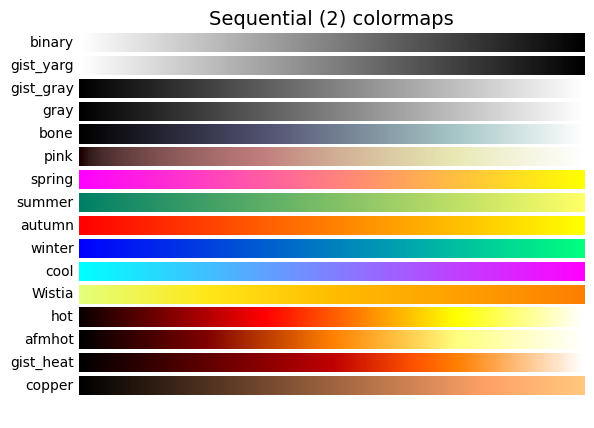

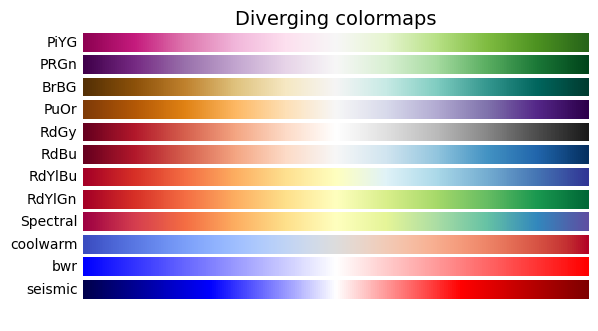

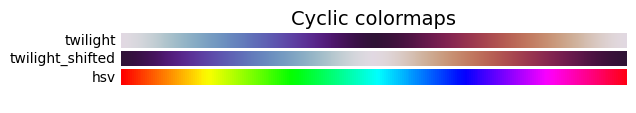

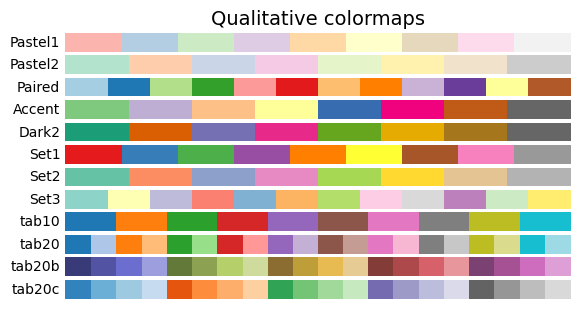

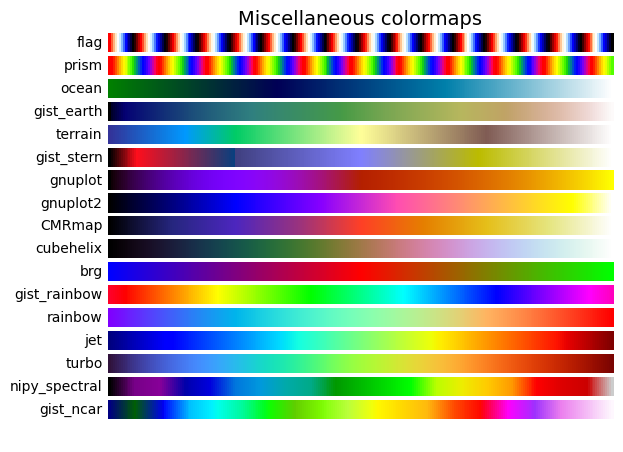

In [224]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()

## Imágenes

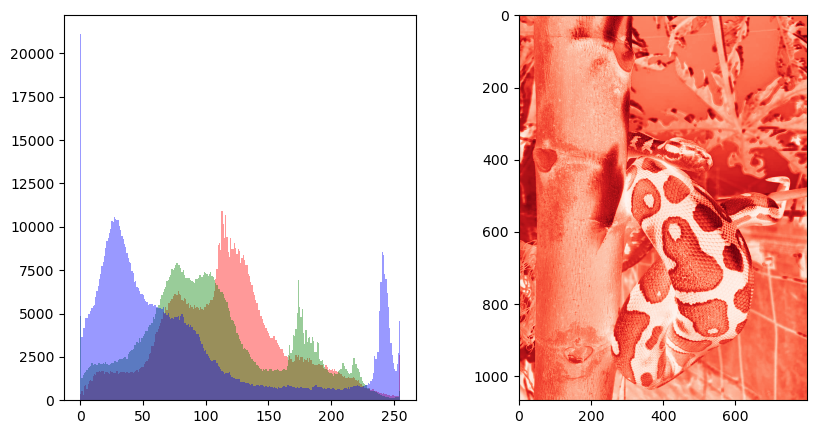

In [40]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax1,ax2= fig.subplots(1,2)
# Read image
img=mpimg.imread('piton.jpg')

# Get histogram
ax1.hist(img[:,:,0].ravel(), bins=256, color='r',alpha=0.4)
ax1.hist(img[:,:,1].ravel(), bins=256, color='g',alpha=0.4)
ax1.hist(img[:,:,2].ravel(), bins=256, color='b',alpha=0.4)
ax2.imshow(img[:,:,0],"Reds")

## Superficies 3D

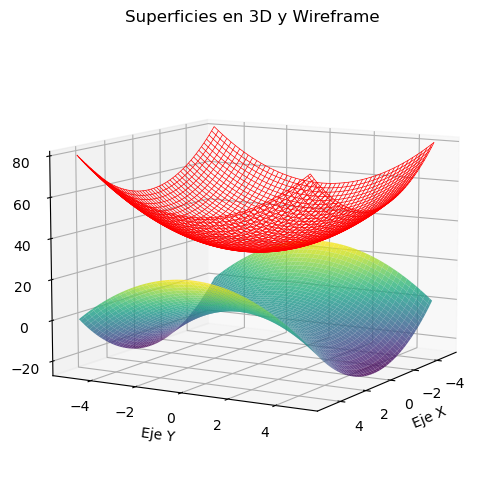

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y ejes 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear malla de coordenadas X y Y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Paraboloide hiperbólico
Z1 = X**2 - Y**2

# Paraboloide elíptico
Z2 = X**2 + Y**2

# Graficar la superficie del paraboloide hiperbólico
ax.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.8)

# Graficar el wireframe del paraboloide elíptico
ax.plot_wireframe(X, Y, Z2+30, color='r', linewidth=0.5)

# Etiquetas de ejes y título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Superficies en 3D y Wireframe')

elev, azim, roll = 10,30,0 # En grados
ax.view_init(elev, azim, roll) 

# Mostrar el gráfico
plt.show()


## 3D en 2D

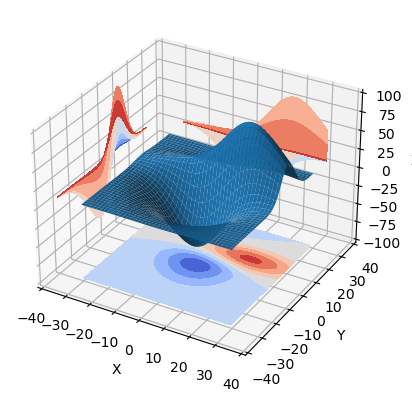

In [250]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

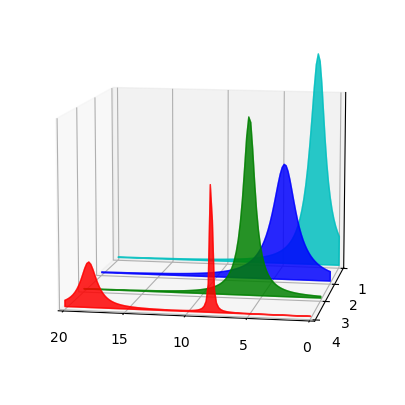

In [53]:
w = np.linspace(0, 20, 120)
lorentz = lambda w0,gamma,A:A*gamma /((w-w0)**2+gamma**2)

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")

a=0.6
c=["r","g","b","c"]
ax.add_collection3d(ax.fill_between(w,lorentz(18,0.8,0.2)+lorentz(8,0.1,0.1),
                                        w*0,alpha=a,color="r", zorder=4),
                      4,zdir="y")

ax.add_collection3d(ax.fill_between(w,lorentz(6,0.6,0.6),w*0,alpha=a,
                                        color="g", zorder=3),3,zdir="y")

ax.add_collection3d(ax.fill_between(w,lorentz(4,1.2,0.8),w*0,alpha=a,
                                        color="b", zorder=2),2,zdir="y")

ax.add_collection3d(ax.fill_between(w,lorentz(2,0.8,1),w*0,alpha=a,
                                        color="c", zorder=1),1,zdir="y")

ax.set_xlim(0,20)
ax.set_ylim(1,4)
ax.set_zlim(0,1)

elev, azim, roll = 10,100,0 # En grados
ax.view_init(elev, azim, roll) 

ax.set_xticks([0,5,10,15,20])
ax.set_yticks([1,2,3,4])
ax.set_zticks([])

plt.show()

## Ejemplo de Clase para graficar en Matplotlib

/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


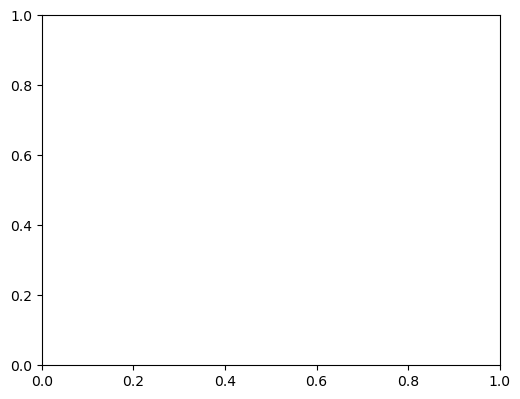

In [88]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.image as mpimg

class CustomPlot:
    def __init__(self, coordenada_x, **kwargs):
        self.x = coordenada_x
        self.rows = 2
        self.cols = 2
        self.gs = GridSpec(self.rows, self.cols, **kwargs)
        self.fig = plt.figure(figsize=(13,10), constrained_layout=True)
        self.ax1 = self.fig.add_subplot(self.gs[0, 0])
        self.ax2 = self.fig.add_subplot(self.gs[0, 1])
        self.ax3 = self.fig.add_subplot(self.gs[1, 0])
        self.current_ax = None
        

    def create_subplot(self, row, col, rowspan=1, colspan=1, projection=None, **kwargs):
        if projection != None:
            self.ax[row * self.cols + col] = self.fig.add_subplot(self.gs[row:row+rowspan, col:col+colspan], projection=projection, **kwargs)
        else:
            self.ax[row * self.cols + col] = self.fig.add_subplot(self.gs[row:row+rowspan, col:col+colspan], **kwargs)
        self.current_ax = self.ax[row * self.cols + col]

    def set_title(self, title, **kwargs):
        if self.current_ax:
            self.current_ax.set_title(title, **kwargs)

    def set_xlabel(self, label, **kwargs):
        if self.current_ax:
            self.current_ax.set_xlabel(label, **kwargs)

    def set_ylabel(self, label, **kwargs):
        if self.current_ax:
            self.current_ax.set_ylabel(label, **kwargs)

    def plot(self, x, y, **kwargs):
        if self.current_ax:
            self.current_ax.plot(x, y, **kwargs)

    def scatter(self, x, y, **kwargs):
        if self.current_ax:
            self.current_ax.scatter(x, y, **kwargs)

    def bar(self, x, height, **kwargs):
        if self.current_ax:
            self.current_ax.bar(x, height, **kwargs)

    def barh(self, y, width, **kwargs):
        if self.current_ax:
            self.current_ax.barh(y, width, **kwargs)

    def errorbar(self, x, y, yerr, **kwargs):
        if self.current_ax:
            self.current_ax.errorbar(x, y, yerr, **kwargs)

    def streamplot(self, X, Y, U, V, **kwargs):
        if self.current_ax:
            self.current_ax.streamplot(X, Y, U, V, **kwargs)

    def plot3d(self, x, y, z, **kwargs):
        if self.current_ax:
            self.current_ax.plot(x, y, z, **kwargs)
            
    def polar(self, row, col, theta, r, **kwargs):
        ax = self.fig.add_subplot(self.gs[row, col], projection='polar')
        ax.plot(theta, r, **kwargs)
        ax.spines['polar'].set_visible(False)

    def contour(self, X, Y, Z, **kwargs):
        if self.current_ax:
            self.current_ax.contour(X, Y, Z, **kwargs)

    def imshow(self, X, **kwargs):
        if self.current_ax:
            self.current_ax.imshow(X, **kwargs)

    def pie(self, x, explode=None, labels=None, colors=None, autopct=None, **kwargs):
        if self.current_ax:
            self.current_ax.pie(x, explode=explode, labels=labels, colors=colors, autopct=autopct, **kwargs)

    def show(self):
        plt.show()
        
CustomPlot(23)

/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


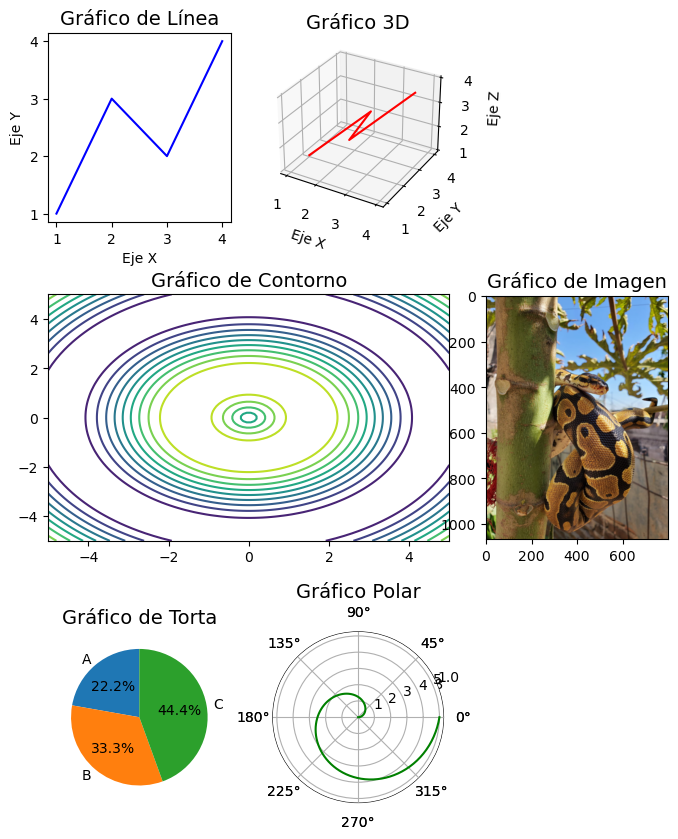

In [83]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.image as mpimg

class CustomPlot:
    def __init__(self, coordenada_x, rows, cols, figsize=(8, 6), **kwargs):
        self.x = coordenada_x
        self.rows = rows
        self.cols = cols
        self.gs = GridSpec(rows, cols, **kwargs)
        self.ax = [None] * (rows * cols)
        self.current_ax = None
        self.fig = plt.figure(figsize=figsize, constrained_layout=True)

    def create_subplot(self, row, col, rowspan=1, colspan=1, projection=None, **kwargs):
        if projection != None:
            self.ax[row * self.cols + col] = self.fig.add_subplot(self.gs[row:row+rowspan, col:col+colspan], projection=projection, **kwargs)
        else:
            self.ax[row * self.cols + col] = self.fig.add_subplot(self.gs[row:row+rowspan, col:col+colspan], **kwargs)
        self.current_ax = self.ax[row * self.cols + col]

    def set_title(self, title, eje, **kwargs):
        if self.current_ax:
            self.ax[eje].set_title(title, **kwargs)

    def set_xlabel(self, label, **kwargs):
        if self.current_ax:
            self.current_ax.set_xlabel(label, **kwargs)

    def set_ylabel(self, label, **kwargs):
        if self.current_ax:
            self.current_ax.set_ylabel(label, **kwargs)

    def plot(self, x, y, **kwargs):
        if self.current_ax:
            self.current_ax.plot(x, y, **kwargs)

    def scatter(self, x, y, **kwargs):
        if self.current_ax:
            self.current_ax.scatter(x, y, **kwargs)

    def bar(self, x, height, **kwargs):
        if self.current_ax:
            self.current_ax.bar(x, height, **kwargs)

    def barh(self, y, width, **kwargs):
        if self.current_ax:
            self.current_ax.barh(y, width, **kwargs)

    def errorbar(self, x, y, yerr, **kwargs):
        if self.current_ax:
            self.current_ax.errorbar(x, y, yerr, **kwargs)

    def streamplot(self, X, Y, U, V, **kwargs):
        if self.current_ax:
            self.current_ax.streamplot(X, Y, U, V, **kwargs)

    def plot3d(self, x, y, z, **kwargs):
        if self.current_ax:
            self.current_ax.plot(x, y, z, **kwargs)
            
    def polar(self, row, col, theta, r, **kwargs):
        ax = self.fig.add_subplot(self.gs[row, col], projection='polar')
        ax.plot(theta, r, **kwargs)
        ax.spines['polar'].set_visible(False)

    def contour(self, X, Y, Z, **kwargs):
        if self.current_ax:
            self.current_ax.contour(X, Y, Z, **kwargs)

    def imshow(self, X, **kwargs):
        if self.current_ax:
            self.current_ax.imshow(X, **kwargs)

    def pie(self, x, explode=None, labels=None, colors=None, autopct=None, **kwargs):
        if self.current_ax:
            self.current_ax.pie(x, explode=explode, labels=labels, colors=colors, autopct=autopct, **kwargs)

    def show(self):
        plt.show()

# Ejemplo de uso
if __name__ == '__main__':
    custom_plot = CustomPlot(rows=5, cols=3, figsize=(8, 10), width_ratios=[1, 1, 1], height_ratios=[10, 1, 13, 2, 9])

    custom_plot.create_subplot(0, 0)
    custom_plot.set_title("Gráfico de Línea", fontsize=14)
    custom_plot.plot([1, 2, 3, 4], [1, 3, 2, 4], label="Serie 1", color='blue')
    custom_plot.set_xlabel("Eje X")
    custom_plot.set_ylabel("Eje Y")

    custom_plot.create_subplot(0, 1, projection='3d')
    custom_plot.set_title("Gráfico 3D", fontsize=14)
    x = [1, 2, 3, 4]
    y = [2, 4, 1, 3]
    z = [1, 2, 3, 4]
    custom_plot.plot3d(x, y, z, label="Serie 2", color='red')
    custom_plot.set_xlabel("Eje X")
    custom_plot.set_ylabel("Eje Y")
    custom_plot.current_ax.set_zlabel("Eje Z")

    custom_plot.create_subplot(4, 1, projection="polar")  # Ubicación específica para el gráfico polar
    custom_plot.set_title("Gráfico Polar", fontsize=14)
    theta = np.linspace(0, 2 * np.pi, 100)
    r = np.linspace(0, 5, 100)
    custom_plot.polar(4, 1, theta, r, label="Serie 1", color='green')

    custom_plot.create_subplot(2, 0, colspan=2)
    custom_plot.set_title("Gráfico de Contorno", fontsize=14)
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2))
    custom_plot.contour(X, Y, Z, levels=10, cmap='viridis')

    custom_plot.create_subplot(2, 2)
    custom_plot.set_title("Gráfico de Imagen", fontsize=14)
    image = mpimg.imread('piton.jpg')
    custom_plot.imshow(image, cmap='hot', interpolation='bilinear')

    custom_plot.create_subplot(4, 0)
    custom_plot.set_title("Gráfico de Torta", fontsize=14)
    custom_plot.pie([20, 30, 40], labels=['A', 'B', 'C'], autopct='%1.1f%%', startangle=90)
    

    custom_plot.show()


In [ ]:
rows = rows
cols = cols
gs = GridSpec(rows, cols, **kwargs)
ax = [None] * (rows * cols)
current_ax = None
fig = plt.figure(figsize=figsize)

def create_subplot(self, row, col, rowspan=1, colspan=1, **kwargs):
    self.ax[row * self.cols + col] = self.fig.add_subplot(self.gs[row:row+rowspan, col:col+colspan], **kwargs)
    self.current_ax = self.ax[row * self.cols + col]

## Animaciones (Opcional)

MovieWriter ffmpeg unavailable; using Pillow instead.
/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_23029/2656158829.py:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data([t[i], y[i]])


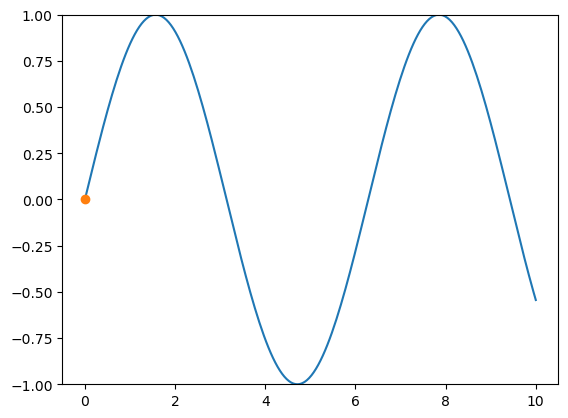

In [267]:
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as an

t = np.linspace(0, 10, 200)
y = np.sin(t)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(t, y)
point, = ax.plot(0, 0, 'o')
ax.set_ylim(-1,1)

def update(i):
    point.set_data([t[i], y[i]])
    return point,


ani = an.FuncAnimation(fig, update, frames=t.size)
ani.save('Animacion.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


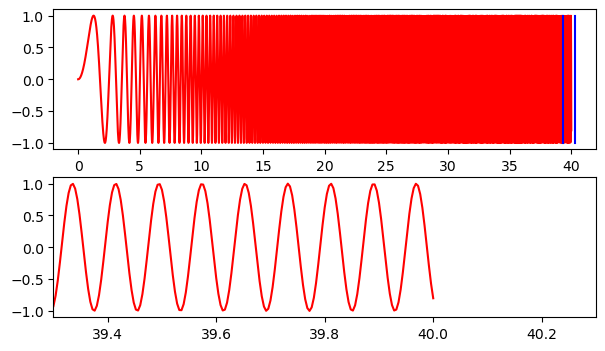

In [268]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  2 21:05:44 2021

@author: hola-
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation

NUMFRAMES = 200
# create a figure and initialize the data
fig = plt.figure(facecolor='w',figsize=(7,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
xs = np.linspace(0,NUMFRAMES/5,10000)
ys = np.sin(xs**2)

ax1.plot(xs, ys, 'r-')
l1, = ax1.plot([0,0],[-1,1],'b-') # line 1 which shows the start point to expand data
l2, = ax1.plot([0,0],[-1,1],'b-') # line 2 which shows the end point to expand data
ax2.plot(xs, ys, 'r-')


def animate(i,l1,l2):
    # update the start/end point, and the data shown in lower subplot
    st,en = i/5-0.5, i/5+0.5
    l1.set_data([st,st],[-1,1])
    l2.set_data([en,en],[-1,1])
    ax2.set_xlim(st,en)
    return fig,

# Animate
ani = mpl.animation.FuncAnimation(fig, animate, fargs=(l1,l2),
                               frames=NUMFRAMES, interval=100, blit=True)
ani.save('Animacion_2.gif', fps=24)